In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../data/customer_churn_data.csv')

In [3]:
data.head(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
5,6,42,Female,16,119.75,Two-Year,DSL,1916.00,Yes,Yes
6,7,60,Male,14,80.32,One-Year,NaN,1124.48,No,Yes
7,8,52,Female,6,58.90,One-Year,NaN,353.40,No,Yes
8,9,40,Female,53,49.81,Two-Year,Fiber Optic,2639.93,Yes,No
9,10,50,Female,10,61.55,Month-to-Month,Fiber Optic,615.50,Yes,Yes


In [4]:
data.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [5]:
data.isna().sum().sum()

np.int64(297)

In [6]:
data['InternetService'] = data['InternetService'].fillna('')

In [7]:
data.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [8]:
data.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [11]:
data.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [12]:
numeric_column_data = data.select_dtypes(include=['number'])

In [13]:
numeric_column_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In the above codeblock: positive value = increase and negative value = decrease 

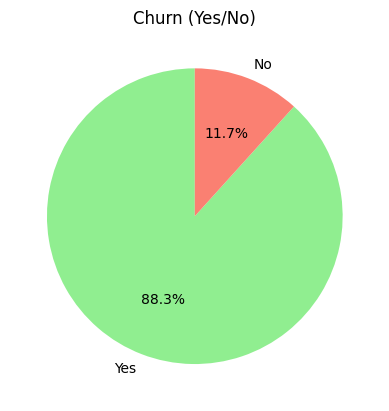

In [14]:
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Churn (Yes/No)')
plt.ylabel("")
plt.show()

In [15]:
data.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [16]:
data.groupby(['Churn','Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [17]:
data.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [18]:
data.groupby('Churn')['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [19]:
data.groupby('ContractType')['MonthlyCharges'].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

Below we can see that the monthly value decreases overtime.

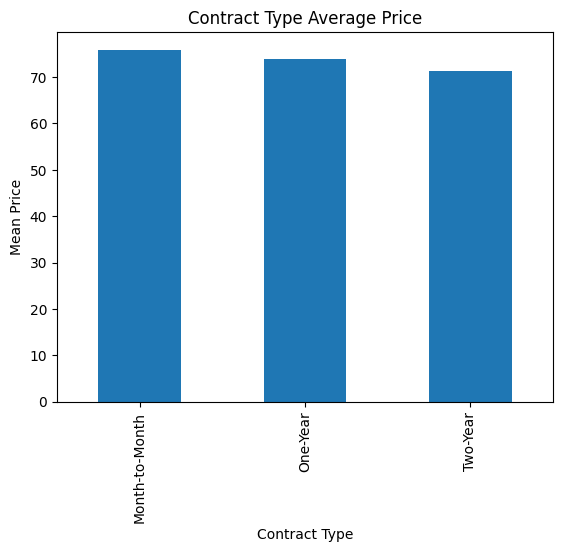

In [20]:
data.groupby('ContractType')['MonthlyCharges'].mean().plot(kind = 'bar')
plt.ylabel('Mean Price')
plt.xlabel('Contract Type')
plt.title('Contract Type Average Price')
plt.show()

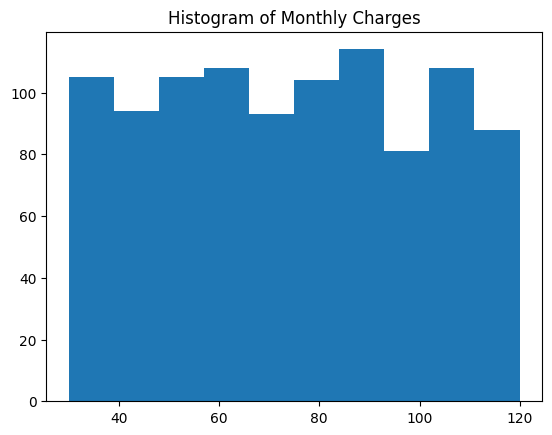

In [21]:
plt.hist(data['MonthlyCharges'])
plt.title('Histogram of Monthly Charges')
plt.show()

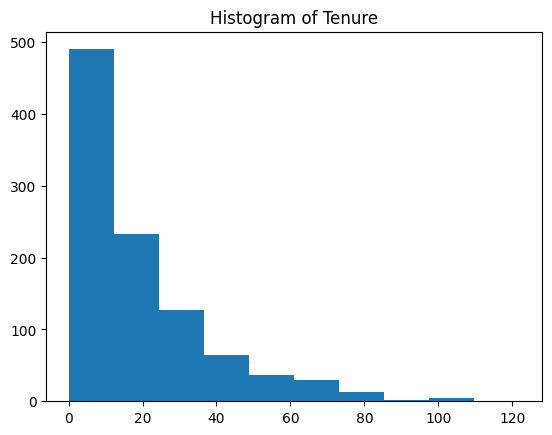

In [22]:
plt.hist(data['Tenure'])
plt.title('Histogram of Tenure')
plt.show()

Feature Engineering 

In [23]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [24]:
data.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [25]:
y = data[['Churn']]
x = data[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]


In [26]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [27]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [28]:
x['Gender'] = x['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

C:\Users\arnob\AppData\Local\Temp\ipykernel_27512\2387561668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender'] = x['Gender'].apply(lambda x: 1 if x == 'Female' else 0)


In [29]:
y['Churn'] = y['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

C:\Users\arnob\AppData\Local\Temp\ipykernel_27512\884819502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn'] = y['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [30]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


80% data will be in the train set and 20 % will be in the test set.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2) 

In [32]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)

In [36]:
X_train

array([[ 0.6441662 ,  0.91370804,  1.01426795,  1.3352549 ],
       [ 0.84464586, -1.0944415 , -0.17602035,  0.26910857],
       [ 0.6441662 ,  0.91370804, -0.90054367, -1.14042605],
       ...,
       [ 0.34344672, -1.0944415 ,  0.08273797, -0.25927136],
       [-2.06230919, -1.0944415 ,  2.10105292, -0.41493029],
       [-0.65895158, -1.0944415 , -0.59003367,  0.58120864]],
      shape=(800, 4))

In [37]:
X_test = scaler.fit_transform(X_test)

In [38]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print('Accuracy score on model is {}'.format(accuracy_score(y_test, predictions)))

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_model = LogisticRegression()

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [44]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [45]:
#Prediction
log_model.predict([[40,0,20,81]])[0]

np.int64(1)

In [46]:
y_pred = log_model.predict(X_test)

In [47]:
modelperformance(y_pred)

Accuracy score on model is 0.9


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [49]:
knn = KNeighborsClassifier()


In [50]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


In [51]:
gridkn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)


In [52]:
gridkn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [53]:
gridkn.best_params_

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}

In [54]:
y_pred = gridkn.predict(X_test)

In [55]:
modelperformance(y_pred)

Accuracy score on model is 0.9


In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [57]:
svc_model = SVC()


In [58]:
param_grid = {
    'C': [0.1, 1, 10],                  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'], # Types of kernel
    'gamma': ['scale', 'auto']          # Kernel coefficient
}


In [59]:
grid_svc = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, verbose=2)


In [60]:
grid_svc.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=2)

In [61]:
print("Best Parameters:", grid_svc.best_params_)
print("Best Score:", grid_svc.best_score_)


Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.8787499999999999


In [62]:
best_svc_model = grid_svc.best_estimator_
y_pred = best_svc_model.predict(X_test)


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [64]:
rf_model = RandomForestClassifier(random_state=42)


In [65]:
param_grid = {
    'n_estimators': [100, 200],         # Number of trees
    'max_depth': [None, 10, 20],        # Maximum depth of the tree
    'min_samples_split': [2, 5],        # Min samples to split a node
    'min_samples_leaf': [1, 2],         # Min samples at a leaf node
    'bootstrap': [True, False]          # Whether bootstrap samples are used
}


In [66]:
grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)


In [67]:
grid_rf.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [68]:
print("Best Parameters:", grid_rf.best_params_)
print("Best Score:", grid_rf.best_score_)


Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8712500000000001


In [69]:
best_rf_model = grid_rf.best_estimator_
y_pred = best_rf_model.predict(X_test)


In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.91
Confusion Matrix:
 [[  1  18]
 [  0 181]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.05      0.10        19
           1       0.91      1.00      0.95       181

    accuracy                           0.91       200
   macro avg       0.95      0.53      0.53       200
weighted avg       0.92      0.91      0.87       200



In [71]:
import joblib

# Save model and scaler to app folder
joblib.dump(gridkn.best_estimator_, "../app/model.pkl")
joblib.dump(scaler, "../app/scaler.pkl")


['../app/scaler.pkl']